300 300 b'peiqi910.jpg' b'jpeg' 0.45666668 0.73333335 0.41333333 0.67333335 b'peiqi' 1


/root/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


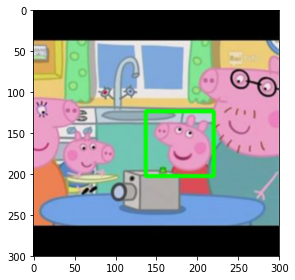

300 300 b'peiqi740.jpg' b'jpeg' 0.58 0.93333334 0.18333334 0.55 b'peiqi' 1


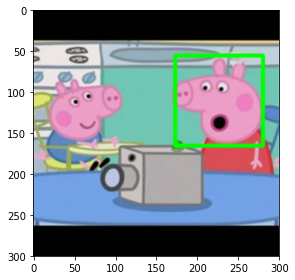

300 300 b'peiqi906.jpg' b'jpeg' 0.46666667 0.6766667 0.43333334 0.65 b'peiqi' 1


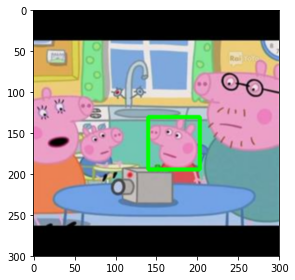

300 300 b'peiqi642.jpg' b'jpeg' 0.47666666 0.87333333 0.49666667 0.8233333 b'peiqi' 1


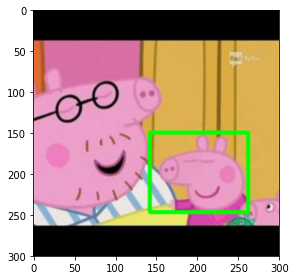

300 300 b'peiqi779.jpg' b'jpeg' 0.7733333 0.96 0.5366667 0.71666664 b'peiqi' 1


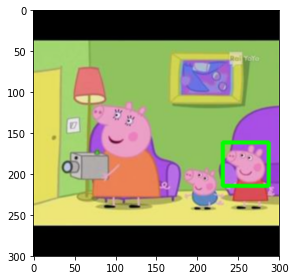

300 300 b'peiqi192.jpg' b'jpeg' 0.18666667 0.36333334 0.47666666 0.6666667 b'peiqi' 1


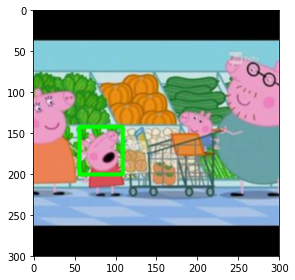

300 300 b'peiqi190.jpg' b'jpeg' 0.15 0.38333333 0.38333333 0.63 b'peiqi' 1


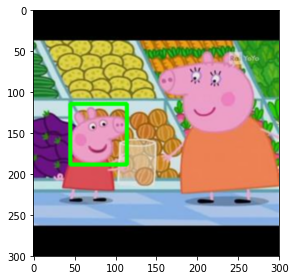

300 300 b'peiqi598.jpg' b'jpeg' 0.083333336 0.41 0.22 0.56666666 b'peiqi' 1


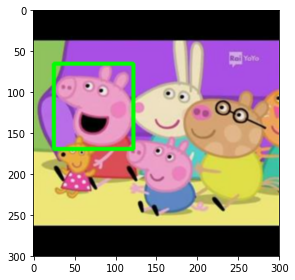

300 300 b'peiqi183.jpg' b'jpeg' 0.06666667 0.31 0.4 0.65 b'peiqi' 1


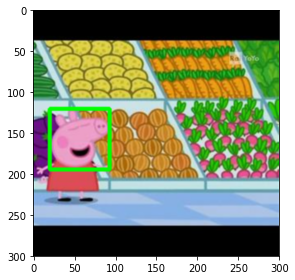

300 300 b'peiqi899.jpg' b'jpeg' 0.14 0.70666665 0.19666667 0.75 b'peiqi' 1


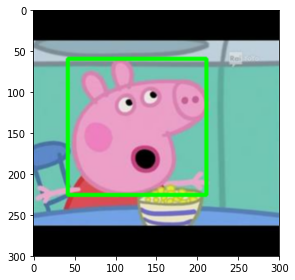

300 300 b'peiqi312.jpg' b'jpeg' 0.053333335 0.29333332 0.4 0.62 b'peiqi' 1


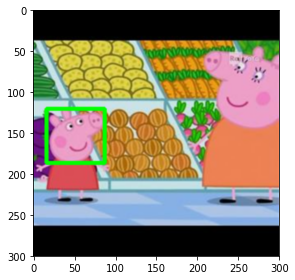

300 300 b'peiqi590.jpg' b'jpeg' 0.03 0.25666666 0.28666666 0.50333333 b'peiqi' 1


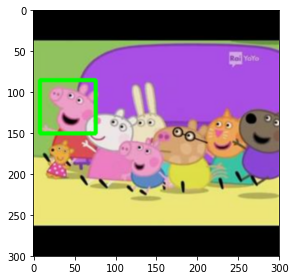

300 300 b'peiqi892.jpg' b'jpeg' 0.39 0.59 0.45333335 0.6333333 b'peiqi' 1


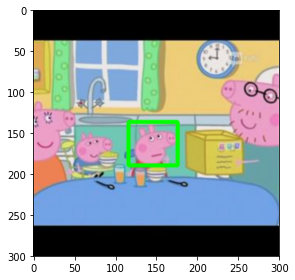

300 300 b'peiqi816.jpg' b'jpeg' 0.20333333 0.36666667 0.5466667 0.70666665 b'peiqi' 1


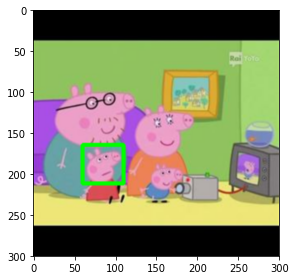

300 300 b'peiqi733.jpg' b'jpeg' 0.5366667 0.6666667 0.50666666 0.64666665 b'peiqi' 1


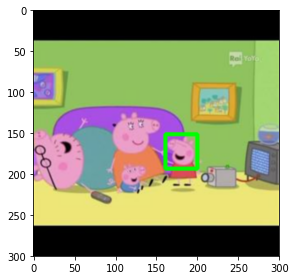

300 300 b'peiqi409.jpg' b'jpeg' 0.7 0.93666667 0.42 0.6533333 b'peiqi' 1


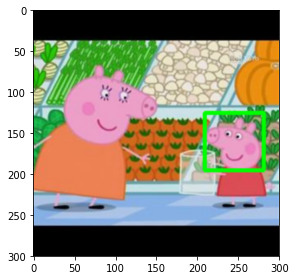

300 300 b'peiqi612.jpg' b'jpeg' 0.52666664 0.81333333 0.57666665 0.81666666 b'peiqi' 1


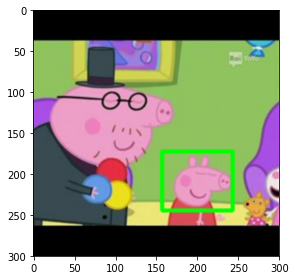

300 300 b'peiqi495.jpg' b'jpeg' 0.09 0.24666667 0.41 0.58 b'peiqi' 1


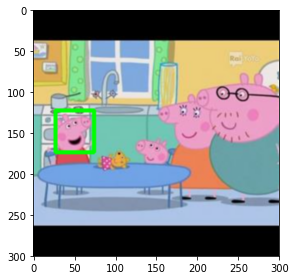

300 300 b'peiqi808.jpg' b'jpeg' 0.21333334 0.38666666 0.5566667 0.71 b'peiqi' 1


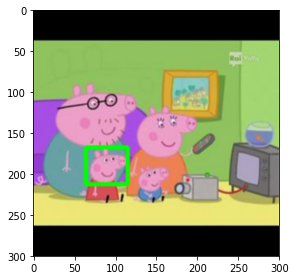

300 300 b'peiqi770.jpg' b'jpeg' 0.32 0.48666668 0.53333336 0.71 b'peiqi' 1


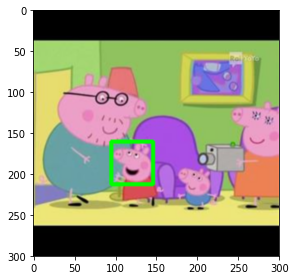

In [2]:
import tensorflow as tf
import numpy as np
import os
import skimage.io as io
import cv2
tfrecords_filename = "train.record"

filename_queue = tf.train.string_input_producer([tfrecords_filename]) 
reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue) 
    
features = tf.parse_single_example(serialized_example,
                                   features={
                                        'image/width':tf.FixedLenFeature([], tf.int64),
                                        'image/height': tf.FixedLenFeature([], tf.int64),
                                        'image/filename':  tf.FixedLenFeature([], tf.string),
                                        'image/source_id': tf.FixedLenFeature([], tf.string),
                                        'image/key/sha256':  tf.FixedLenFeature([], tf.string),
                                        'image/encoded': tf.FixedLenFeature([], tf.string),
                                        'image/format':  tf.FixedLenFeature([], tf.string),
                                        'image/object/bbox/xmin': tf.FixedLenFeature([], tf.float32),
                                        'image/object/bbox/xmax': tf.FixedLenFeature([], tf.float32),
                                        'image/object/bbox/ymin':tf.FixedLenFeature([], tf.float32),
                                        'image/object/bbox/ymax':tf.FixedLenFeature([], tf.float32),
                                        'image/object/class/text':tf.FixedLenFeature([], tf.string),
                                        'image/object/class/label': tf.FixedLenFeature([], tf.int64),
                                   })  

width= tf.cast(features['image/width'], tf.int32)
height = tf.cast(features['image/height'], tf.int32)
filename = tf.cast(features['image/filename'], tf.string)
format = tf.cast(features['image/format'], tf.string)
xmin = tf.cast(features['image/object/bbox/xmin'], tf.float32)
xmax = tf.cast(features['image/object/bbox/xmax'], tf.float32)
ymin = tf.cast(features['image/object/bbox/ymin'], tf.float32)
ymax = tf.cast(features['image/object/bbox/ymax'], tf.float32)
text = tf.cast(features['image/object/class/text'], tf.string)
label = tf.cast(features['image/object/class/label'], tf.int64)

image =tf.image.decode_jpeg(features['image/encoded']);
image = tf.reshape(image,tf.stack([height,width,3]))




with tf.Session() as sess: 
    init_op = tf.initialize_all_variables()
    sess.run(init_op)
    coord=tf.train.Coordinator()
    threads= tf.train.start_queue_runners(coord=coord)
    for i in range(20):
        width1,height1,filename1,format1,xmin1,xmax1,ymin1,ymax1,text1,label1,image1=sess.run([width,height,filename,format,xmin,xmax,ymin,ymax,text,label,image])
        print(width1,height1,filename1,format1,xmin1,xmax1,ymin1,ymax1,text1,label1)
        x1,y1=int(xmin1*width1),int(ymin1*height1)
        x2,y2=int(xmax1*width1),int(ymax1*height1)
        io.imshow(cv2.rectangle(np.array(image1),(x1,y1),(x2,y2),(0,255,0),3), cmap = 'gray', interpolation = 'bicubic')
        io.show()
        
    coord.request_stop()
    coord.join(threads)